In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline

# Данные

Описание колонок датасета:

*   **customer_id** — Клиентский идентификатор.
*   **credit_score** — Кредитный рейтинг.
*   **country** — Страна.
*   **gender** — Пол.
*   **age** — Возраст.
*   **tenure** — Стаж.
*   **balance** — Баланс.
*   **products_number** — Количество продуктов.
*   **credit_card** — Кредитная карта.
*   **active_member** — Активный член.
*   **estimated_salary** — Предполагаемая зарплата.
*   **churn** — Отток, используется как целевая переменная. 1, если клиент покинул банк за определенный период, или 0, если нет.



# 1. Предобработка данных

In [ ]:
# Загрузим данные
df = pd.read_csv('data/Bank_Customer_Churn_Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# общая информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB



В датасете содержатся следующие типы данных:

* customer_id: Столбец содержит числовые идентификаторы клиентов банка.
* credit_score: Здесь представлены числовые значения кредитного рейтинга клиентов.
* country: Столбец указывает на страну клиента и содержит категориальные данные (названия стран).
* gender: Столбец содержит информацию о поле клиента, категориальные данные: "Female" и "Male".
* age: Возраст клиентов, представлен числовыми значениями.
* tenure: Столбец содержит числовые значения, представляющие стаж клиентов в банке.
* balance: Баланс клиентов на их счетах, представлен числовыми значениями.
* products_number: Число продуктов, используемых клиентами, представлено числовыми данными.
* credit_card: Данный столбец, является бинарным, указывая, имеет ли клиент кредитную карту. Принимает значения 0 (нет) и 1 (да).
* active_member: Бинарный столбец, указывающий, является ли клиент активным членом банка. Также принимает значения 0 (неактивный) и 1       (активный).
* estimated_salary: Предполагаемая зарплата клиентов, представлен числовыми значениями.
* churn: Целевая переменная, указывающая на отток клиента. Она также бинарна, принимая значения 0 (не произошел отток) и 1 (произошел отток).

В этом датасете присутствуют числовые, категориальные и бинарные типы данных.

In [ ]:
df.isnull().sum() # Пропусков нет

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# Выделим колонки с категориальными признаками
categorical_columns = df.select_dtypes(include=['object']).columns

# Посмотрим на зачения категориальных переменных, чтобы убедиться что
# нет пропусков (пустых строк, незначимых строк)
for i in categorical_columns:
  print(i)
  print(df[i].value_counts(), end='\n\n')

country
France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

gender
Male      5457
Female    4543
Name: gender, dtype: int64



In [ ]:
# Удалим полонку уникальных индификаторов customer_id
print("Количество повротов в колонке customer_id: ", len(df) - df.customer_id.nunique())
df.drop(columns='customer_id', inplace=True)

Количество повротов в колонке customer_id:  0


# EDA

<AxesSubplot:xlabel='country'>

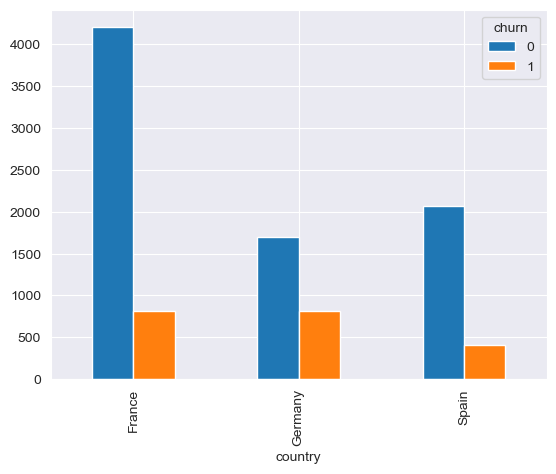

In [ ]:
df.groupby(['country', 'churn']).churn.count().unstack().plot(kind='bar')

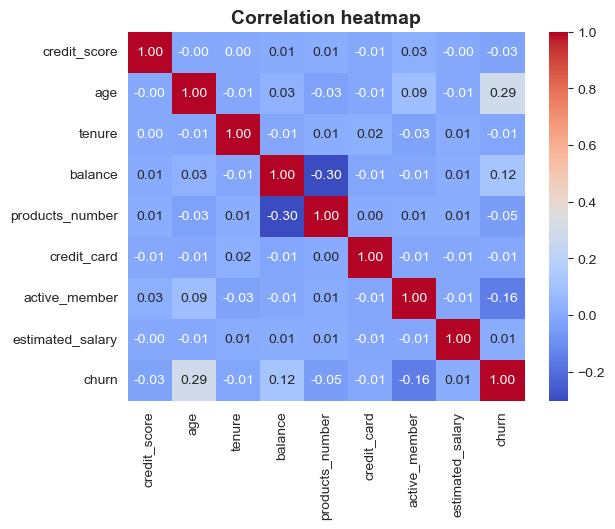

In [ ]:
ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt="0.2f")
ax.set_title("Correlation heatmap", fontsize=14, weight='bold')
plt.show()

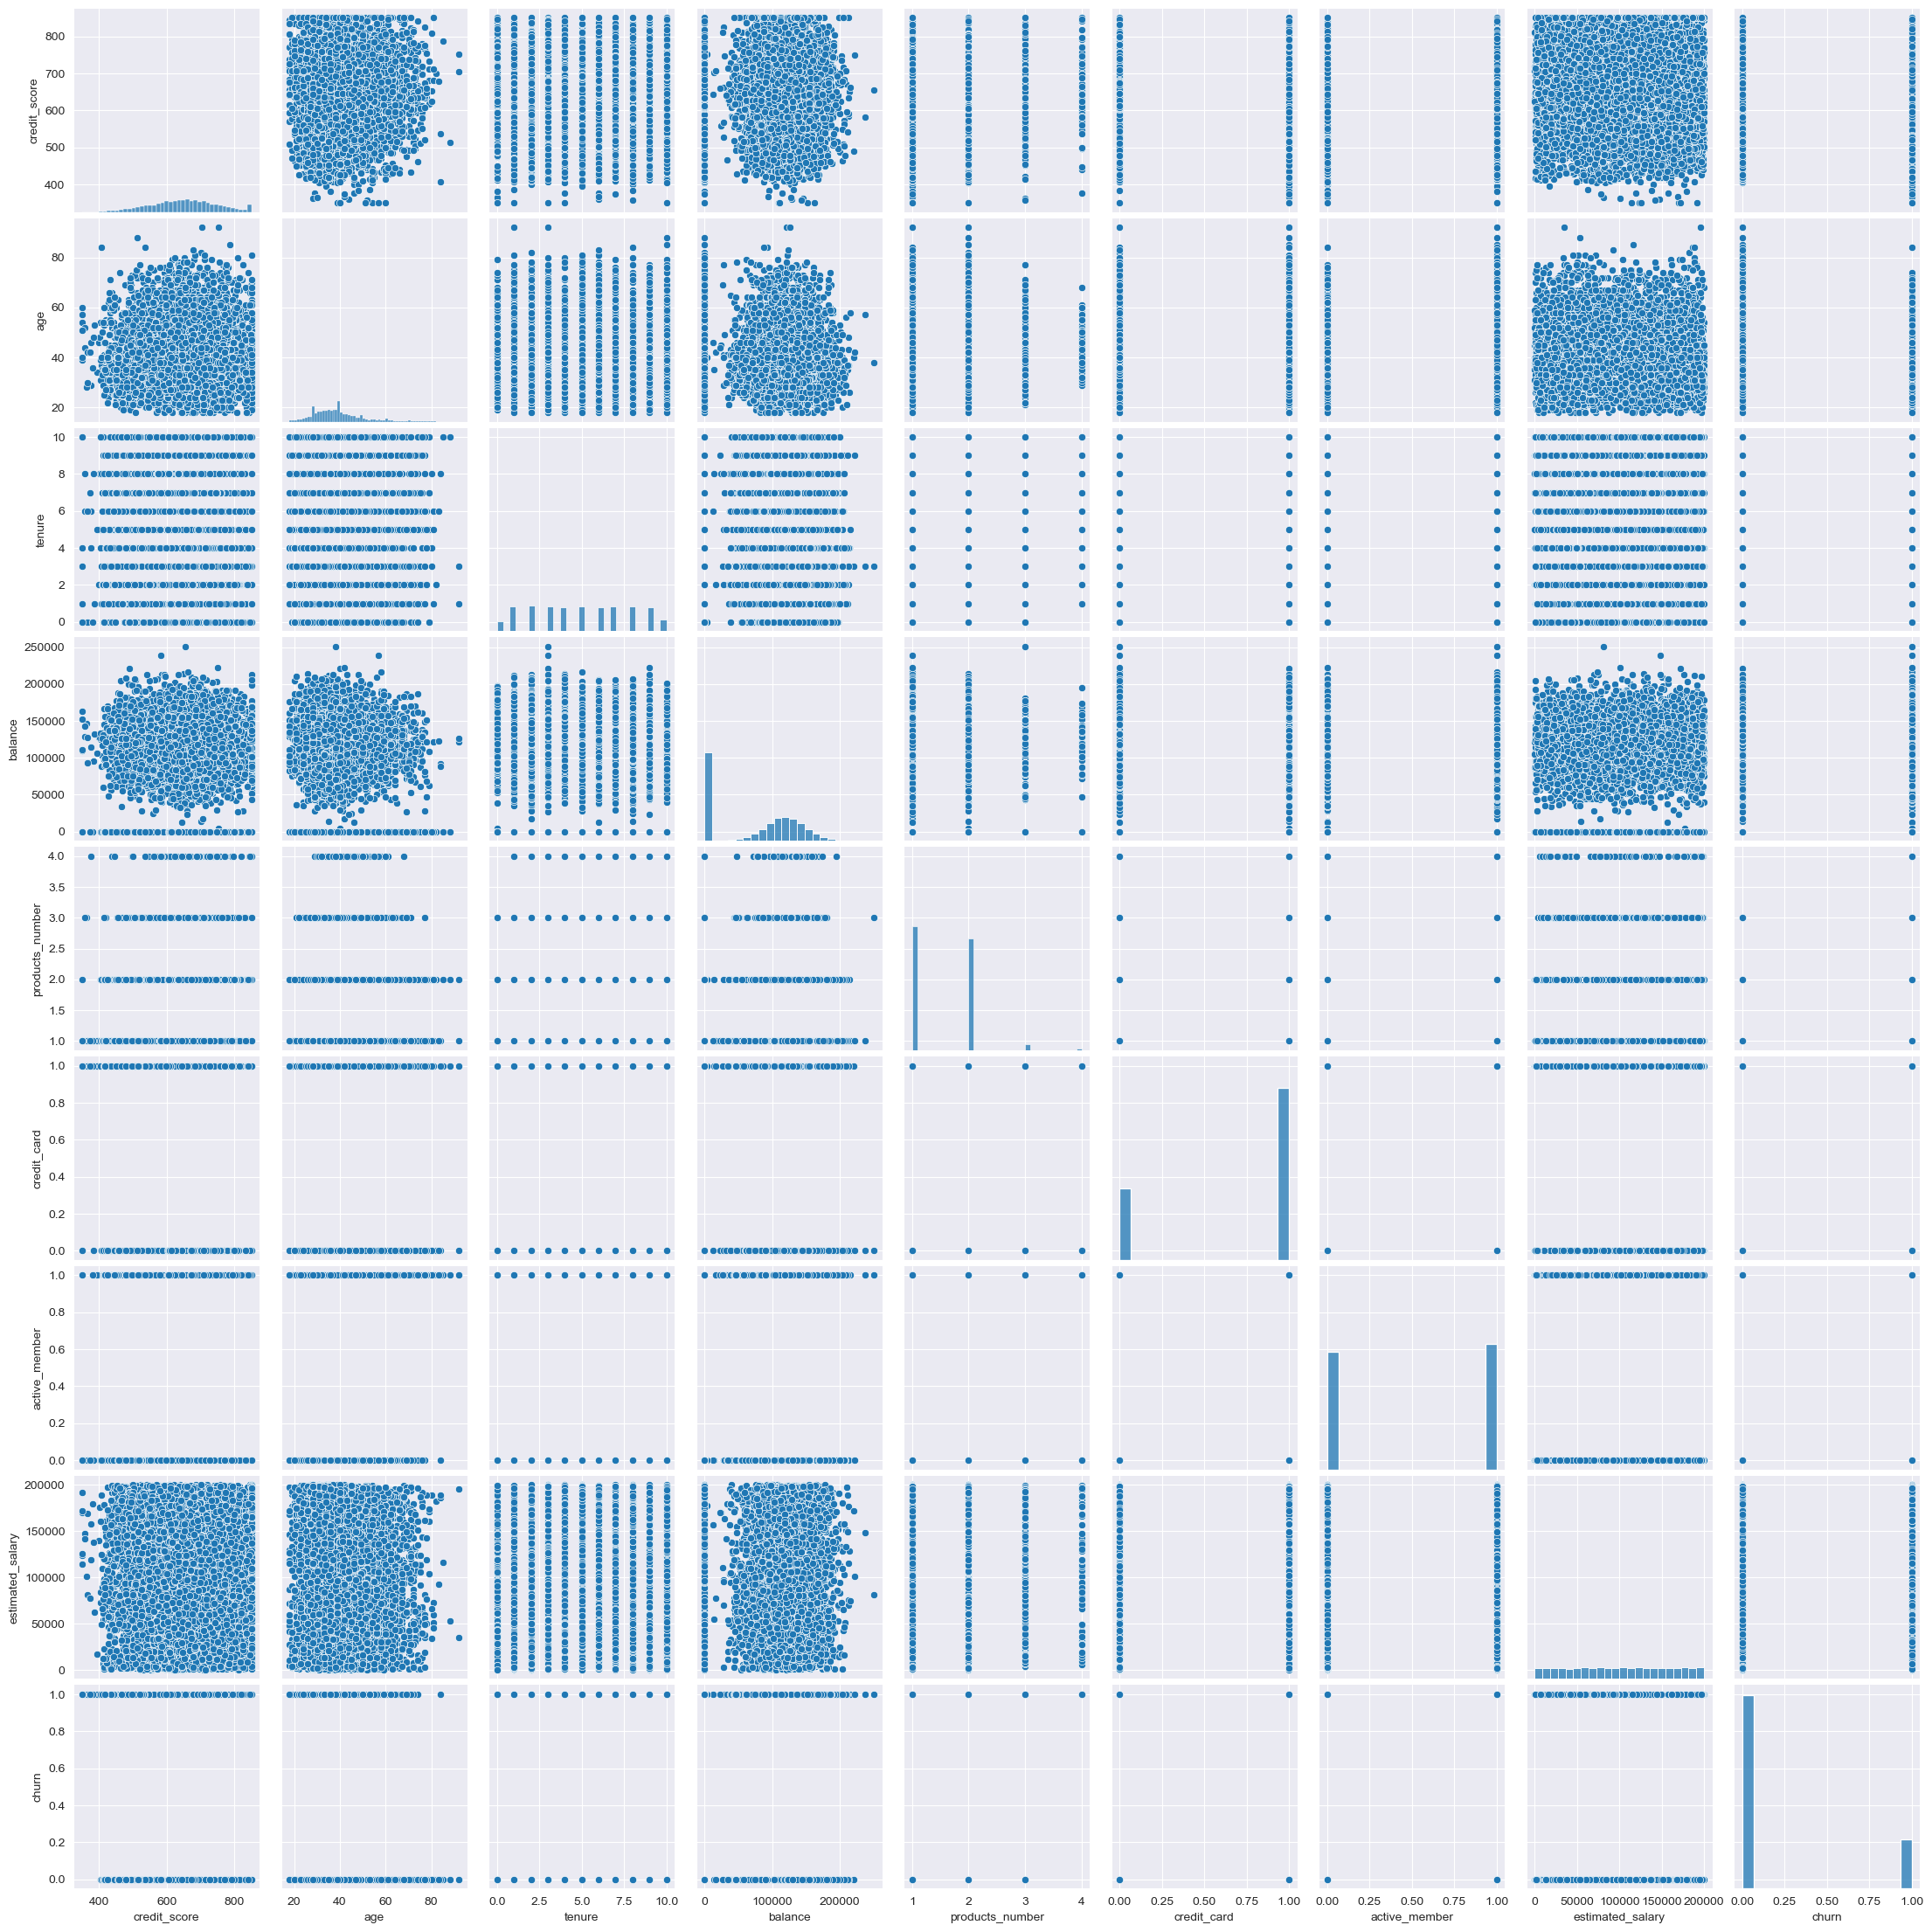

In [ ]:
sns.pairplot(df);

# Закодируем категориальные переменные